<a href="https://colab.research.google.com/github/Yun-8bit/Assignment-3-Week-/blob/main/1%EB%B2%88%20%EC%84%A0%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

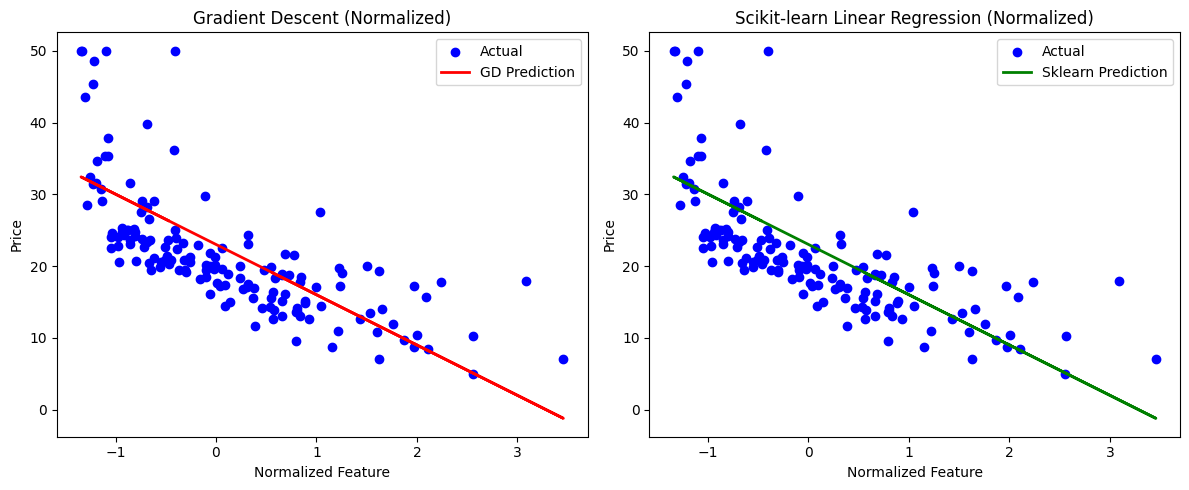

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 불러오기
X_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/boston_house_data.xlsx')
y_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/boston_house_target.xlsx')

# 입력 데이터의 마지막 열 사용, 출력 데이터의 2번째 열 사용
X = X_data.iloc[:, -1].values.reshape(-1, 1)
y = y_data.iloc[:, 1].values.reshape(-1, 1)

# 데이터 분할 (7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 입력 데이터 정규화
X_mean = np.mean(X_train)
X_std = np.std(X_train)
X_train_norm = (X_train - X_mean) / X_std
X_test_norm = (X_test - X_mean) / X_std

# 경사하강법 구현 (정규화 적용)
def gradient_descent(X, y, learning_rate=0.01, iterations=10000):
    m = len(y)
    w = 0
    b = 0
    for _ in range(iterations):
        y_pred = w * X + b
        dw = (-2/m) * np.sum(X * (y - y_pred))
        db = (-2/m) * np.sum(y - y_pred)
        w -= learning_rate * dw
        b -= learning_rate * db
    return w, b

w_gd, b_gd = gradient_descent(X_train_norm, y_train)

# GD로 예측 (정규화된 데이터 사용)
y_pred_gd = w_gd * X_test_norm + b_gd

# scikit-learn 선형회귀 모델 학습 (정규화된 데이터 사용)
lr_model = LinearRegression()
lr_model.fit(X_train_norm, y_train)
y_pred_lr = lr_model.predict(X_test_norm)

# 시각화
plt.figure(figsize=(12, 5))

# 경사하강법 시각화
plt.subplot(1, 2, 1)
plt.scatter(X_test_norm, y_test, color='blue', label='Actual')
plt.plot(X_test_norm, y_pred_gd, color='red', linewidth=2, label='GD Prediction')
plt.title('Gradient Descent (Normalized)')
plt.xlabel('Normalized Feature')
plt.ylabel('Price')
plt.legend()

# scikit-learn 선형회귀 시각화
plt.subplot(1, 2, 2)
plt.scatter(X_test_norm, y_test, color='blue', label='Actual')
plt.plot(X_test_norm, y_pred_lr, color='green', linewidth=2, label='Sklearn Prediction')
plt.title('Scikit-learn Linear Regression (Normalized)')
plt.xlabel('Normalized Feature')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()